In [85]:
from libraries import detection
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
from io import BytesIO
from six.moves import urllib
from tensorflow.keras.applications import inception_v3, InceptionV3
tf.__version__

'1.9.0'

## Inception V3 architecture to predict ImageNet classes

In [83]:
model = InceptionV3(weights='imagenet', include_top=True)

In [84]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
__________________________________________________________________________________________________
conv2d_95 

In [5]:
k = model.get_layer("input_1")
k.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [86]:
img = plt.imread("Images/french-horn.jpg")
img.shape

(144, 256, 3)

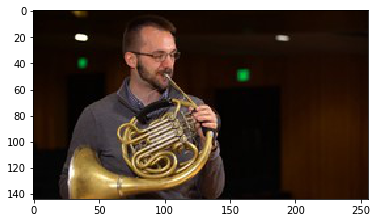

In [87]:
plt.imshow(img)

In [94]:
pimg = inception_v3.preprocess_input(np.expand_dims(img.astype(float), axis=0))
print np.min(img), np.max(img)
print np.min(pimg), np.max(pimg)

0 255
-1.0 1.0


### predict and decode

In [91]:
pred = model.predict(pimg)
pred.shape

(1, 1000)

In [93]:
print "highest probabilities", np.sort(pred[0])[::-1][:10]
print "highest class codes  ", np.argsort(pred[0])[::-1][:10]

highest probabilities [1.0000000e+00 7.4672565e-13 9.5526384e-14 4.8184445e-14 2.8556889e-14
 1.5264919e-14 4.4176635e-15 4.2324597e-15 3.5231300e-15 1.9848949e-15]
highest class codes   [566 432  57 683 262 687  70 639 397 767]


In [96]:
from tensorflow.keras.applications.inception_v3 import decode_predictions

print 'Predicted:', decode_predictions(pred, top=5)


Predicted: [[(u'n03394916', u'French_horn', 1.0), (u'n02804610', u'bassoon', 7.4672565e-13), (u'n01735189', u'garter_snake', 9.5526384e-14), (u'n03838899', u'oboe', 4.8184445e-14), (u'n02112706', u'Brabancon_griffon', 2.855689e-14)]]


### occlusion at random

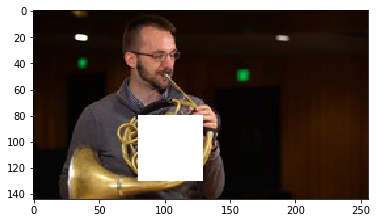

In [172]:
oimg = img.copy()
w,h=50,50
bx,by = np.random.randint(img.shape[1]-w), np.random.randint(img.shape[0]-h)
bx,by=80,80
oimg[by:by+h,bx:bx+w]=np.max(oimg)
p = oimg[by:by+h,bx:bx+w,:]
plt.imshow(oimg)

observe how prediction probabilities change when occlusion happens on the key object. Try also the following:

- bx=80 and by=80
- bx=20 and by=90 

what part of the instrument is more responsible for the CNN classification?

In [173]:
pimg = inception_v3.preprocess_input(np.expand_dims(oimg.astype(float), axis=0))
pred = model.predict(pimg)
print 'Predicted:', decode_predictions(pred, top=5)

Predicted: [[(u'n02672831', u'accordion', 1.0), (u'n04141076', u'sax', 9.510231e-09), (u'n01677366', u'common_iguana', 2.4315665e-09), (u'n03976467', u'Polaroid_camera', 1.946517e-09), (u'n02804610', u'bassoon', 2.243368e-10)]]
